In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [2]:
population = Table.read_table('san_francisco_2015.csv').where('Total Salary', are.above(10000))
population.show(3)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",2481,Water Qualitytech I/II,21538,82146,0,0,82146,16942.2,12340.9,6337.73,35620.8,117767
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,7393,Soft Floor Coverer,5459,32165.8,973.19,848.96,33987.9,0,4587.51,2634.42,7221.93,41209.8
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1636,Health Care Billing Clerk 2,41541,71311,5757.98,0,77069,14697.6,12424.5,6370.06,33492.2,110561


Population Median =  76723.69


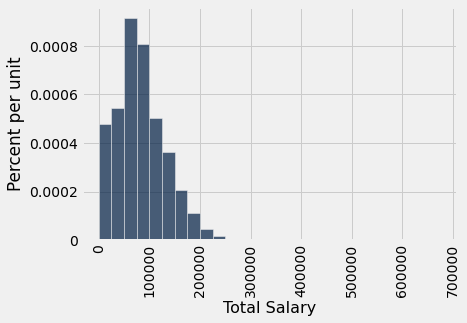

In [4]:
pop_median = np.median(population.column('Total Salary'))
sf_bins = np.arange(0, 700000, 25000)
population.hist('Total Salary', bins=sf_bins)
print("Population Median = ", pop_median)

Population Median =  76723.69
Sample Median =  77237.63500000001


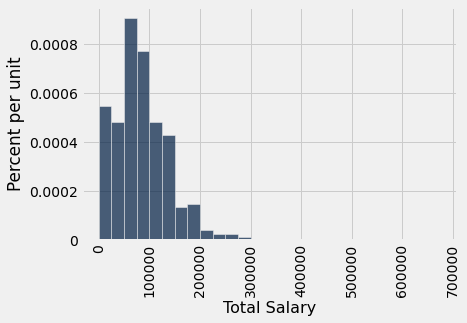

In [6]:
### Random sample of size 300

our_sample = population.sample(300, with_replacement = False)
our_sample_median = np.median(our_sample.column('Total Salary'))
our_sample.hist('Total Salary', bins=sf_bins)
print("Population Median = ", pop_median)
print("Sample Median = ", our_sample_median)

In [11]:
### Simulate the distribution of the bootstrap sample median
### bootstrap sample : sample :: sample : population

### NOTE: this whole simulation only uses our_sample, we don't use the population

def one_bootstrap_median():
    single_sample = our_sample.sample()
    return np.median(single_sample.column('Total Salary'))

bootstrap_medians = make_array()
for i in np.arange(1000):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)

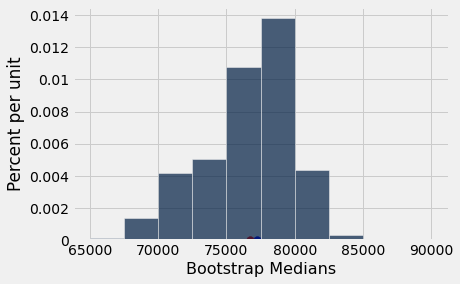

In [22]:
med_bins = np.arange(65000, 90001, 2500)
Table().with_column('Bootstrap Medians', bootstrap_medians).hist('Bootstrap Medians', bins=med_bins)
plots.scatter(pop_median, 0, s=60, color="red");
plots.scatter(our_sample_median, 0, s=60, color="blue");

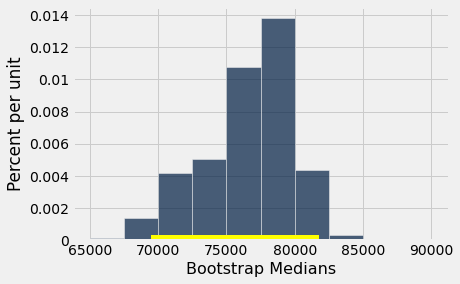

In [29]:
left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)

Table().with_column('Bootstrap Medians', bootstrap_medians).hist('Bootstrap Medians', bins=med_bins)
plots.plot([left, right], [0, 0], color='yellow', lw=10, zorder=1)
# plots.scatter(pop_median, 0, color='green', s=60, zorder=2)

In [30]:
print(left, right)

69509.625 81759.32500000001
